In [78]:
from Hierarchy.PipelineFunctions.MainWorkers import FUNCOFMETHODS, times_when_method_better, NewRunExperiment, ReadLogs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
from tqdm import tqdm
import os
import pickle

/var/folders/7g/1dqbz5hx5994z2r91kw1_k2m0000gn/T/ipykernel_23411/1275269095.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
def generation(size, dim):
    norm_dist = sts.norm(0, 1000)
    x = norm_dist.rvs(size).astype(int)

    if dim == 1:
        y = np.zeros(len(x))
    elif dim == 2:
        y = norm_dist.rvs(size).astype(int)

    points = list(zip(x, y))
    points = np.unique(points, axis=0)
    
    return np.array(points)

In [7]:
for dist_metric in ('euclidean', 'cityblock', 'chebyshev'):
    for dim in (1, 2):
        for pm in ((5, 1000), (10, 1000), (100, 100)):
            NewRunExperiment(pm[0] * pm[1] + 2000, generation, pm[0], pm[1], FUNCOFMETHODS, dist_metric, dim)

100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


### Анализ

In [13]:
for log in [dir for dir in os.listdir("LOGS") if ('1dim' in dir) or ('2dim' in dir)]:
    print(log)
    
    TimeLogsList, Ultradists, SamplesList, MaxList, SumList, NameOfMethodList = ReadLogs(log)

    flag = 0
    for num, ultra in enumerate(Ultradists):
        if sorted(ultra) != ultra:
            print(f"Пример номер {NameOfMethodList[num]}: {num}")
            print(ultra)
            print()
            flag = 1
            
if flag != 1:
    print("The methods is monotonous")
    print()

1dim-chebyshev-100-100 2023-04-20 01:45:40
1dim-cityblock-100-100 2023-04-20 01:39:15
1dim-euclidean-10-1.0k 2023-04-20 01:32:33
2dim-chebyshev-10-1.0k 2023-04-20 01:48:28
2dim-cityblock-100-100 2023-04-20 01:42:23
2dim-chebyshev-5-1.0k 2023-04-20 01:48:21
2dim-euclidean-10-1.0k 2023-04-20 01:35:39
1dim-chebyshev-10-1.0k 2023-04-20 01:45:22
2dim-euclidean-5-1.0k 2023-04-20 01:35:33
1dim-cityblock-5-1.0k 2023-04-20 01:38:51
1dim-cityblock-10-1.0k 2023-04-20 01:38:57
2dim-cityblock-10-1.0k 2023-04-20 01:42:04
1dim-chebyshev-5-1.0k 2023-04-20 01:45:16
2dim-euclidean-100-100 2023-04-20 01:35:58
2dim-chebyshev-100-100 2023-04-20 01:48:46
2dim-cityblock-5-1.0k 2023-04-20 01:41:58
1dim-euclidean-100-100 2023-04-20 01:32:52
1dim-euclidean-5-1.0k 2023-04-20 01:32:27
The methods is monotonous



<AxesSubplot: >

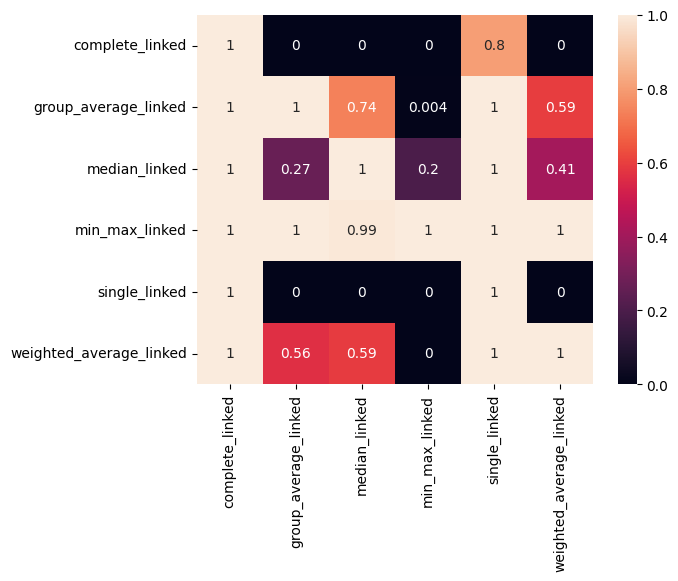

In [14]:
MaxMatrix = pd.DataFrame({'MetricsByMethodsForMax': MaxList, 'NameOfMethod': NameOfMethodList})

grouper = MaxMatrix.groupby('NameOfMethod')
ResultsForMax = pd.concat([pd.Series(v['MetricsByMethodsForMax'].tolist(), name=k) for k, v in grouper], axis=1)

sns.heatmap(times_when_method_better(ResultsForMax), annot=True)

<AxesSubplot: >

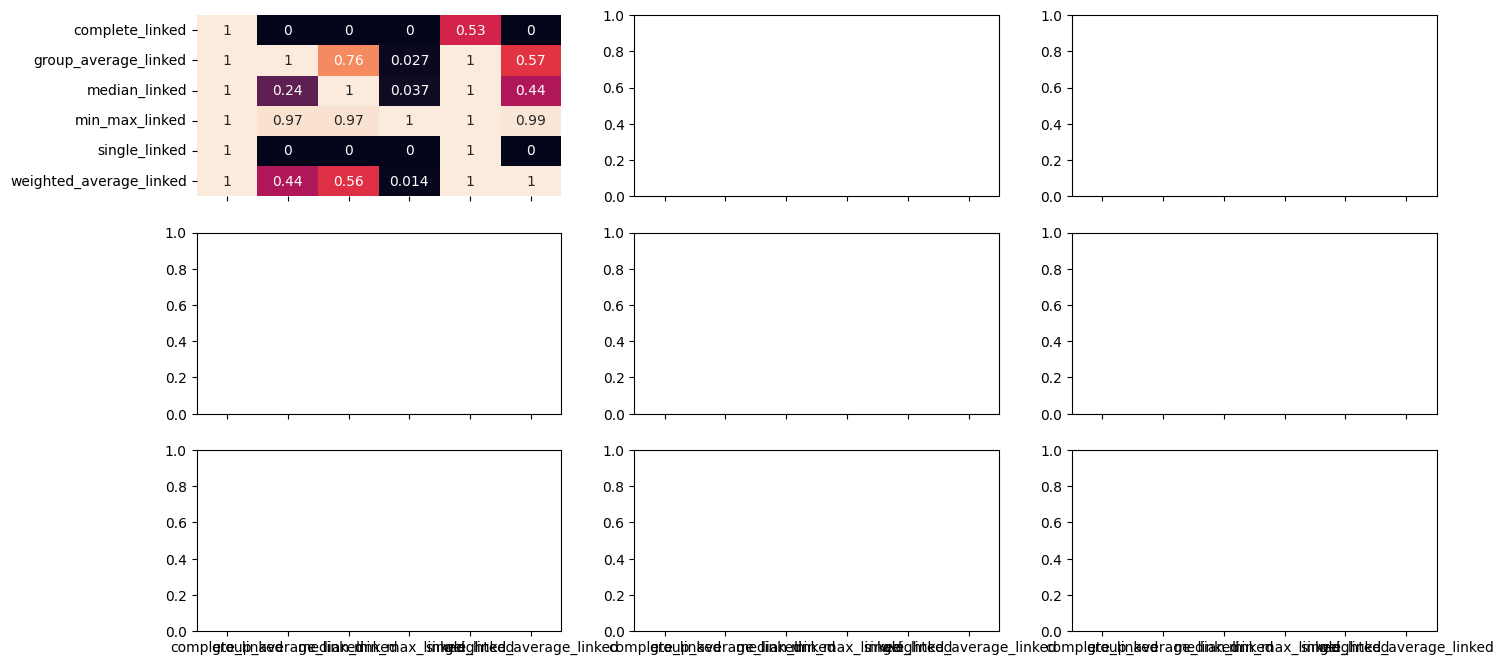

In [53]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
# fig.suptitle('3 rows x 4 columns axes with no data')
# axes[0].set_title('Title of the first chart')


# sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
# axes[0].set_title(bulbasaur.name)

# # Charmander
# sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
# axes[1].set_title(charmander.name)

# # Squirtle
# sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
# axes[2].set_title(squirtle.name)


MaxMatrix = pd.DataFrame({'MetricsByMethodsForMax': MaxList, 'NameOfMethod': NameOfMethodList})

grouper = MaxMatrix.groupby('NameOfMethod')
ResultsForMax = pd.concat([pd.Series(v['MetricsByMethodsForMax'].tolist(), name=k) for k, v in grouper], axis=1)

sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[0][0], annot=True, cbar=False)

In [46]:
def GetResultsMax(filename):
    TimeLogsList, Ultradists, SamplesList, MaxList, SumList, NameOfMethodList = ReadLogs(filename)

    MaxMatrix = pd.DataFrame({'MetricsByMethodsForMax': MaxList, 'NameOfMethod': NameOfMethodList})
    
    grouper = MaxMatrix.groupby('NameOfMethod')

    ResultsForMax = pd.concat([pd.Series(v['MetricsByMethodsForMax'].tolist(), name=k) for k, v in grouper], axis=1)

    return ResultsForMax

# def GetGraph():
#     sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[0][0], annot=True, cbar=False)
#     sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[0][0], annot=True, cbar=False)

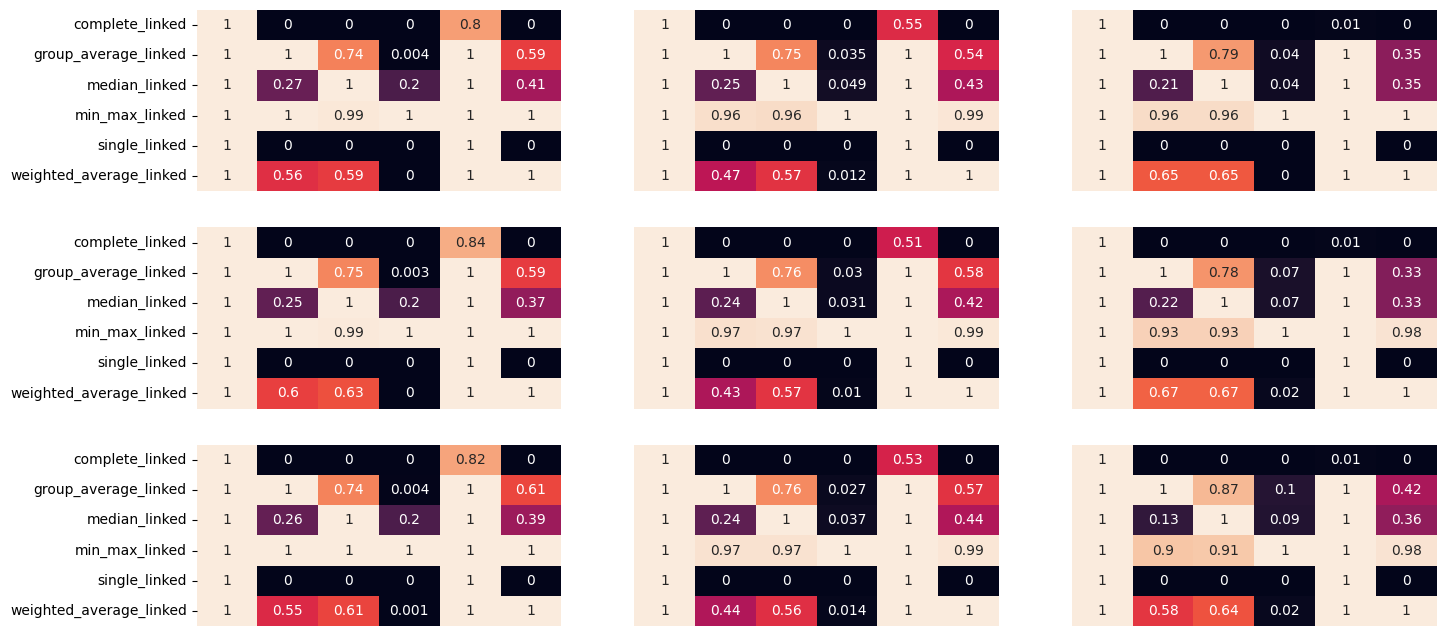

In [77]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))


for dirdim in [dir for dir in os.listdir("LOGS") if '1dim' in dir]:
    if 'euclidean' in dirdim:
        if '5-1.0k' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[0][0], annot=True, cbar=False, xticklabels=False)
        elif '10-1.0k' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[0][1], annot=True, cbar=False, xticklabels=False, yticklabels=False)
        elif '100-100' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[0][2], annot=True, cbar=False, xticklabels=False, yticklabels=False)
    elif 'cityblock' in dirdim:
        if '5-1.0k' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[1][0], annot=True, cbar=False, xticklabels=False)
        elif '10-1.0k' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[1][1], annot=True, cbar=False, xticklabels=False, yticklabels=False)
        elif '100-100' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[1][2], annot=True, cbar=False, xticklabels=False, yticklabels=False)
    elif 'chebyshev' in dirdim:
        if '5-1.0k' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[2][0], annot=True, cbar=False)
        elif '10-1.0k' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[2][1], annot=True, cbar=False, yticklabels=False)
        elif '100-100' in dirdim:
            ResultsForMax = GetResultsMax(dirdim)
            sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[2][2], annot=True, cbar=False, yticklabels=False)

In [ ]:
#     [dir for dir in os.listdir("LOGS") if '1dim' in dir]


#     TimeLogsList, Ultradists, SamplesList, MaxList, SumList, NameOfMethodList = ReadLogs(log)

#     MaxMatrix = pd.DataFrame({'MetricsByMethodsForMax': MaxList, 'NameOfMethod': NameOfMethodList})
#     SumMatrix = pd.DataFrame({'MetricsByMethodsForSum': SumList, 'NameOfMethod': NameOfMethodList})
    
#     grouper = MaxMatrix.groupby('NameOfMethod')
#     grouper = SumMatrix.groupby('NameOfMethod')

#     ResultsForMax = pd.concat([pd.Series(v['MetricsByMethodsForMax'].tolist(), name=k) for k, v in grouper], axis=1)
#     ResultsForSum = pd.concat([pd.Series(v['MetricsByMethodsForSum'].tolist(), name=k) for k, v in grouper], axis=1)

    
#     sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[0][0], annot=True, cbar=False)
#     sns.heatmap(data=times_when_method_better(ResultsForMax), ax=axes[0][0], annot=True, cbar=False)

array([[  0.,   2., 200.,   2.],
       [  1.,   3., 250.,   2.],
       [  5.,   6., 280.,   4.],
       [  4.,   7., 400.,   5.]])

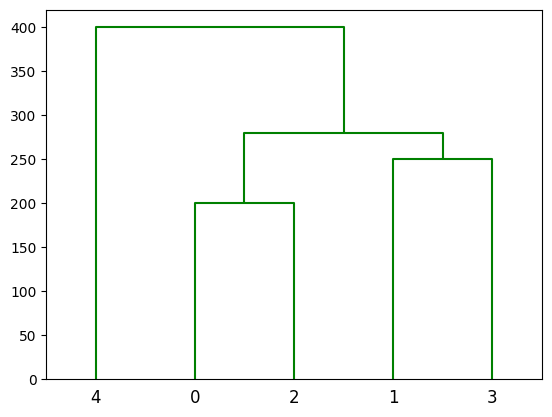

In [170]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
x = np.array([741., 200., 300., 400., 500., 250.,450., 280., 450., 750.])
temp = hierarchy.linkage(x, 'single')
plt.figure()
dn = hierarchy.dendrogram(temp, above_threshold_color="green", color_threshold=.7)
temp

In [193]:
from scipy.cluster import hierarchy

def MakeDendogram(sample, ultras):
    temp = hierarchy.linkage(sample, 'single')
    temp[:, 2] = ultras
    plt.figure()
    dn = hierarchy.dendrogram(temp)

    for i, d in zip(dn['icoord'], dn['dcoord']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        plt.plot(x, y, 'ro')
        plt.annotate(y, (x, y), xytext=(0, -8),
                        textcoords='offset points',
                        va='top', ha='center')

In [ ]:
SamplesList[4], Ultradists[4]

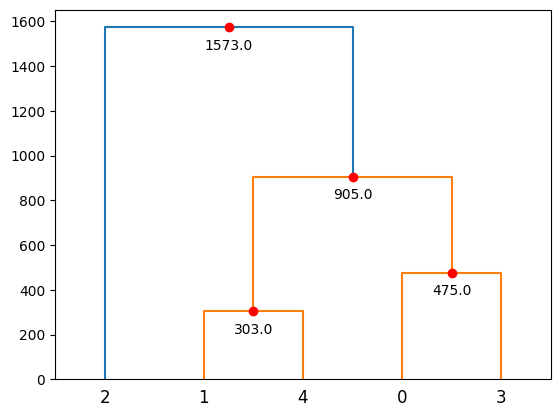

In [194]:
MakeDendogram(SamplesList[4], Ultradists[4])